In [55]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from pylab import plot, show
from matplotlib.lines import Line2D
import matplotlib.colors as mcolors
from PIL import Image

In [56]:
books = pd.read_csv('Books (1).csv')
users = pd.read_csv('Users.csv')
ratings = pd.read_csv('Ratings.csv')

/var/folders/hd/xr2z9snj7yl69m8f9f6z_vg80000gn/T/ipykernel_32354/1573488372.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books = pd.read_csv('Books (1).csv')


In [57]:
# books.head()
book_list = books[['Book-Title']]
books.head()
# list(books['Book-Title'].values)[2]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [9]:
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [10]:
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [11]:
# total rows in the data
print('Shape of books data set is :', books.shape)
print('Shape of users data set is :',users.shape)
print('Shape of ratings data set is :',ratings.shape)

Shape of books data set is : (271360, 8)
Shape of users data set is : (278858, 3)
Shape of ratings data set is : (1149780, 3)


In [12]:
# missing data
books.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            1
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

In [53]:
books.head()

Wild Animus                   2502
The Lovely Bones: A Novel     1295
The Da Vinci Code              898
A Painted House                838
The Nanny Diaries: A Novel     828
Name: Title, dtype: int64

In [13]:
users.isnull().sum()

User-ID          0
Location         0
Age         110762
dtype: int64

In [14]:
ratings.isnull().sum()

User-ID        0
ISBN           0
Book-Rating    0
dtype: int64

In [15]:
# books['Book-Title'].duplicated().sum()
books.duplicated().sum()

0

In [16]:
ratings.duplicated().sum()

0

In [17]:
users.duplicated().sum()

0

In [18]:
books.shape

(271360, 8)

In [19]:
books.drop(['Image-URL-S', 'Image-URL-L'], axis=1, inplace=True)


In [22]:
books['ISBN'].value_counts()

0195153448    1
0746008481    1
0395219906    1
043916169X    1
0879235322    1
             ..
1568303823    1
0525947612    1
207036819X    1
2877306127    1
0767409752    1
Name: ISBN, Length: 271360, dtype: int64

In [23]:
books['Book-Title'].value_counts()

Selected Poems                                                                                                                    27
Little Women                                                                                                                      24
Wuthering Heights                                                                                                                 21
The Secret Garden                                                                                                                 20
Dracula                                                                                                                           20
                                                                                                                                  ..
What Every Kid Should Know                                                                                                         1
The Seventh Enemy (A Brady Coyne Mystery)                            

In [24]:
users.shape

(278858, 3)

In [25]:
users['User-ID'].value_counts()

1         1
185904    1
185910    1
185909    1
185908    1
         ..
92959     1
92960     1
92961     1
92962     1
278858    1
Name: User-ID, Length: 278858, dtype: int64

In [26]:
users['Location'].value_counts()

london, england, united kingdom                  2506
toronto, ontario, canada                         2250
sydney, new south wales, australia               1744
melbourne, victoria, australia                   1708
portland, oregon, usa                            1629
                                                 ... 
gneisenaustr. 3, nordrhein-westfalen, germany       1
-, bayern, germany                                  1
bouchegouf, guelma, algeria                         1
indiana and philadelphia, pennsylvania, usa         1
tacoma, washington, united kingdom                  1
Name: Location, Length: 57339, dtype: int64

<AxesSubplot:>

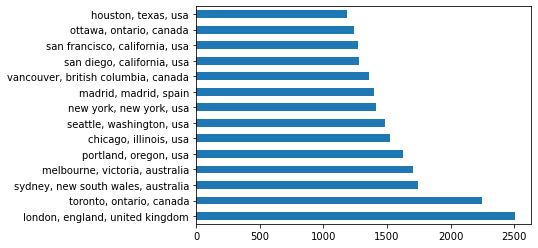

In [27]:
users['Location'].value_counts()[:14].plot(kind='barh')

<AxesSubplot:>

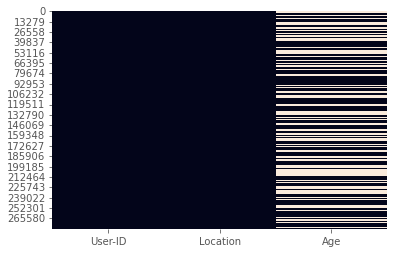

In [30]:
sns.heatmap((users).isnull(), cbar=False)

In [31]:
ratings.shape

(1149780, 3)

In [32]:
ratings['ISBN'].value_counts()

0971880107     2502
0316666343     1295
0385504209      883
0060928336      732
0312195516      723
               ... 
1568656386        1
1568656408        1
1569551553        1
1570081808        1
05162443314       1
Name: ISBN, Length: 340556, dtype: int64

In [33]:
ratings['User-ID'].value_counts()

11676     13602
198711     7550
153662     6109
98391      5891
35859      5850
          ...  
116180        1
116166        1
116154        1
116137        1
276723        1
Name: User-ID, Length: 105283, dtype: int64

In [34]:
ratings['Book-Rating'].value_counts()

0     716109
8     103736
10     78610
7      76457
9      67541
5      50974
6      36924
4       8904
3       5996
2       2759
1       1770
Name: Book-Rating, dtype: int64

In [38]:
df = pd.merge(ratings, books, on="ISBN", how="left")
df.rename(columns = {'Book-Rating':'Rating', 'Book-Author':'Author', 'Book-Title':'Title'}, inplace = True)
df.head(3)

,User-ID,ISBN,Rating,Title,Author,Publisher,Image-URL-M
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...
1,276726,0155061224,5,Rites of Passage,Judith Rae,Heinle,http://images.amazon.com/images/P/0155061224.0...
2,276727,0446520802,0,The Notebook,Nicholas Sparks,Warner Books,http://images.amazon.com/images/P/0446520802.0...


<AxesSubplot:>

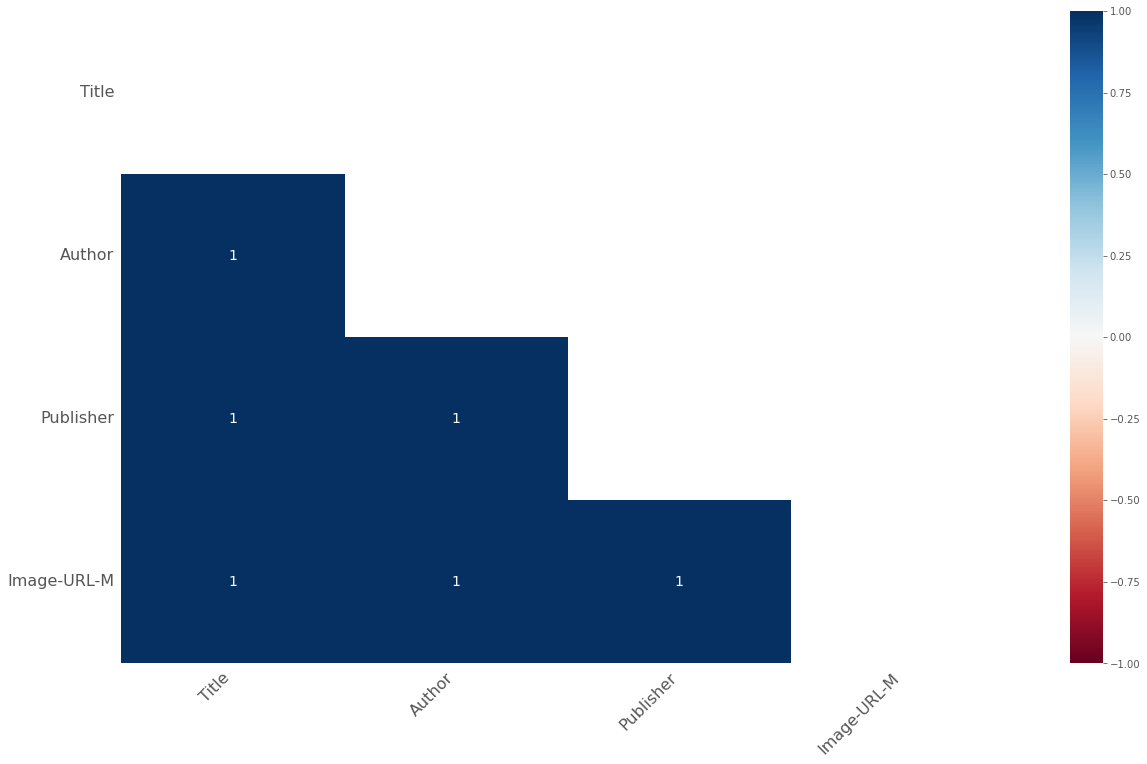

In [39]:
# Gives a heatmap of how missing values are related
import missingno as msno
msno.heatmap(df)

<AxesSubplot:>

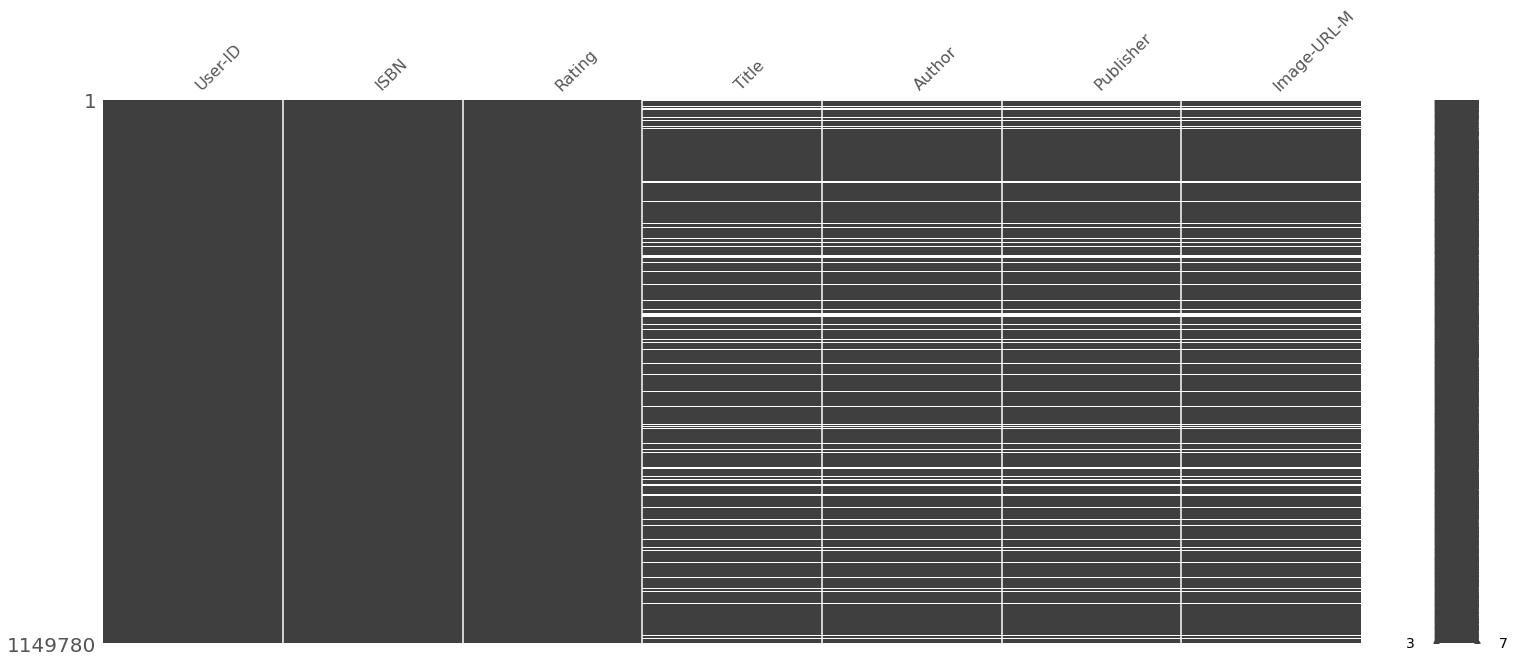

In [40]:
# Gives positional information of the missing values
msno.matrix(df)

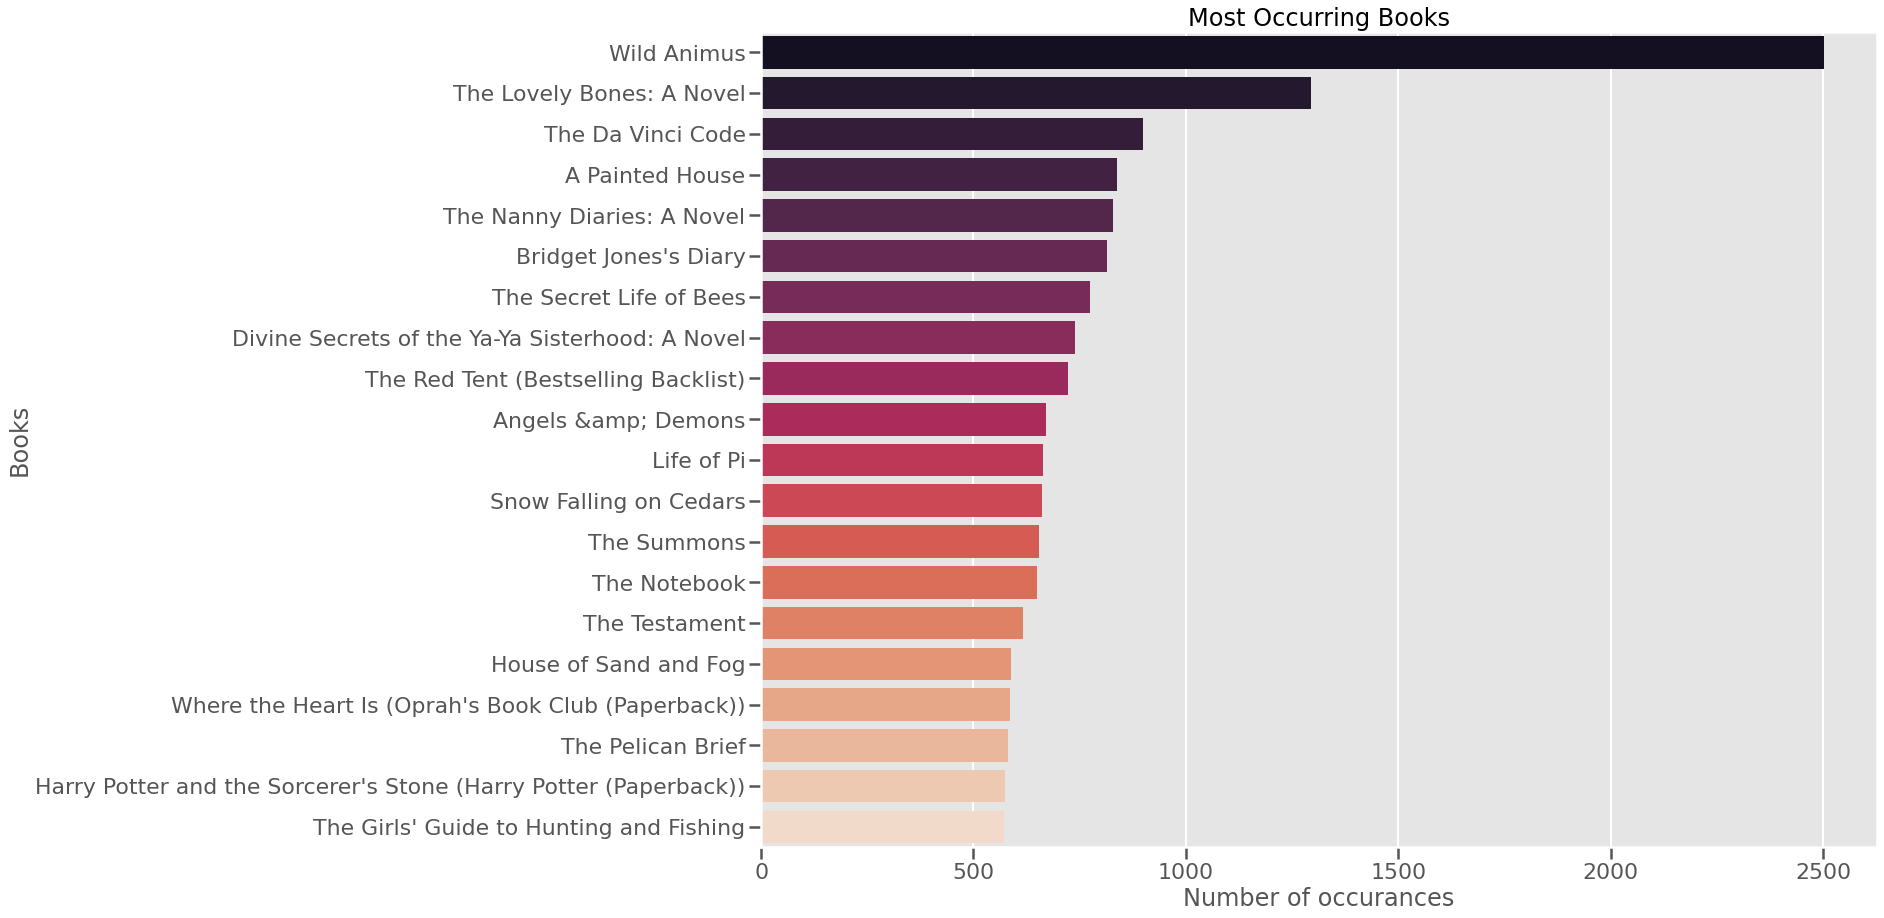

In [41]:
#20 most occuring books on the list:

sns.set_context('poster')
plt.figure(figsize=(20,15))
books = df['Title'].value_counts()[:20]
rating = df.Rating[:20]
sns.barplot(x = books, y = books.index, palette='rocket')
plt.title("Most Occurring Books")
plt.xlabel("Number of occurances")
plt.ylabel("Books")
plt.show()

/Users/punamichowdary/Applications/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


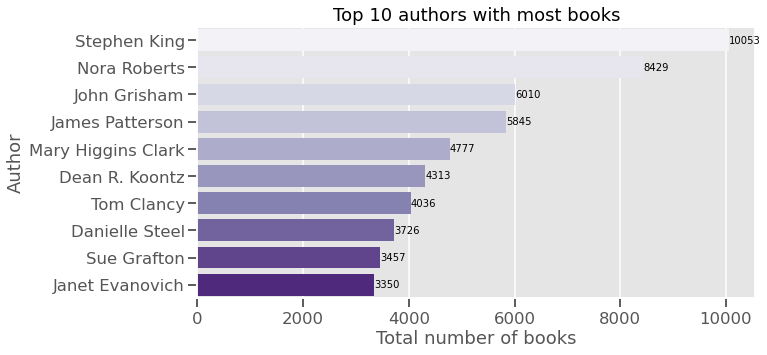

In [42]:
sns.set_context('talk')
most_books = df.groupby('Author')['Title'].count().reset_index().sort_values('Title', ascending=False).head(10).set_index('Author')
plt.figure(figsize=(10,5))
ax = sns.barplot(most_books['Title'], most_books.index, palette='Purples')
ax.set_title("Top 10 authors with most books")
ax.set_xlabel("Total number of books")
for i in ax.patches:
    ax.text(i.get_width()+.3, i.get_y()+0.5, str(round(i.get_width())), fontsize = 10, color = 'k')

/Users/punamichowdary/Applications/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


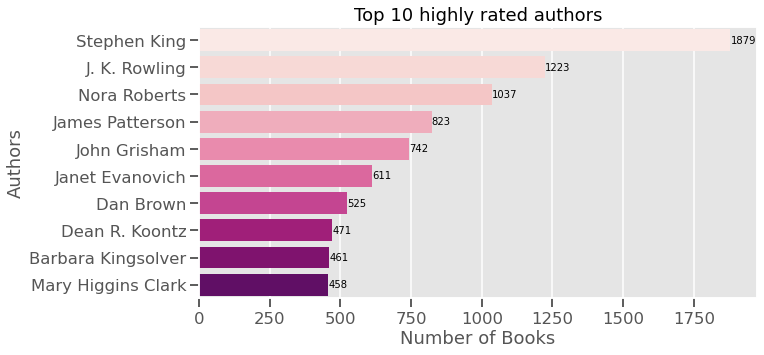

In [43]:
high_rated_author = df[df['Rating']>=9]
high_rated_author = high_rated_author.groupby('Author')['Title'].count().reset_index().sort_values('Title', ascending = False).head(10).set_index('Author')
plt.figure(figsize=(10,5))
ax = sns.barplot(high_rated_author['Title'], high_rated_author.index, palette='RdPu')
ax.set_title("Top 10 highly rated authors")
ax.set_xlabel("Number of Books")
ax.set_ylabel("Authors")
for i in ax.patches:
    ax.text(i.get_width()+.3, i.get_y()+0.5, str(round(i.get_width())), fontsize = 10, color = 'k')

/Users/punamichowdary/Applications/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Rating', ylabel='Density'>

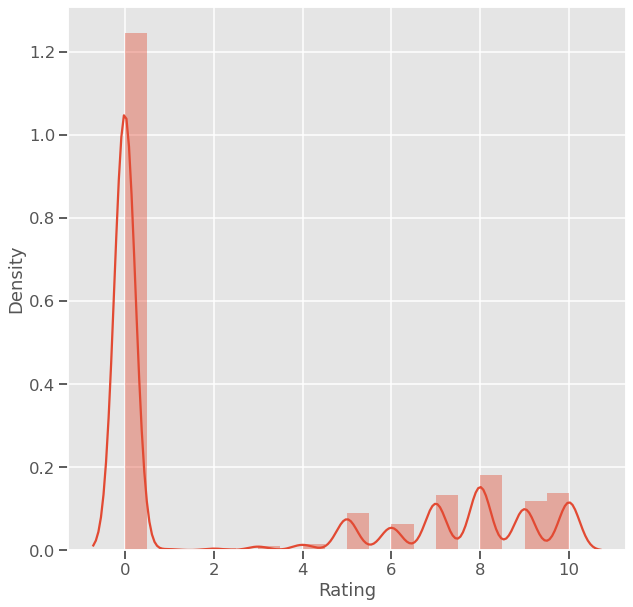

In [44]:
# rating distribution
plt.figure(figsize=(10,10))
rating= df.Rating.astype(float)
sns.distplot(rating, bins=20)


## Model building

## Popularity Based Recommendation System

In [61]:
# merge books and ratings based on ISBN column
ratings_with_name = pd.merge(ratings, books, on="ISBN", how="left")
ratings_with_name.head(3)

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...
1,276726,0155061224,5,Rites of Passage,Judith Rae,2001,Heinle,http://images.amazon.com/images/P/0155061224.0...,http://images.amazon.com/images/P/0155061224.0...,http://images.amazon.com/images/P/0155061224.0...
2,276727,0446520802,0,The Notebook,Nicholas Sparks,1996,Warner Books,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...,http://images.amazon.com/images/P/0446520802.0...


In [62]:
# group by the number of ratings for each book
num_rating_df = ratings_with_name.groupby('Book-Title').count()['Book-Rating'].reset_index()
num_rating_df.rename(columns={'Book-Rating': 'num_ratings'},inplace=True)
num_rating_df

,Book-Title,num_ratings
0,A Light in the Storm: The Civil War Diary of ...,4
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1
4,Beyond IBM: Leadership Marketing and Finance ...,1
...,...,...
241066,Ã?Â?lpiraten.,2
241067,Ã?Â?rger mit Produkt X. Roman.,4
241068,Ã?Â?sterlich leben.,1
241069,Ã?Â?stlich der Berge.,3


In [63]:
# group by the average ratings for each book
avg_rating_df = ratings_with_name.groupby('Book-Title').mean()['Book-Rating'].reset_index()
avg_rating_df.rename(columns={'Book-Rating': 'avg_ratings'},inplace=True)
avg_rating_df

,Book-Title,avg_ratings
0,A Light in the Storm: The Civil War Diary of ...,2.250000
1,Always Have Popsicles,0.000000
2,Apple Magic (The Collector's series),0.000000
3,"Ask Lily (Young Women of Faith: Lily Series, ...",8.000000
4,Beyond IBM: Leadership Marketing and Finance ...,0.000000
...,...,...
241066,Ã?Â?lpiraten.,0.000000
241067,Ã?Â?rger mit Produkt X. Roman.,5.250000
241068,Ã?Â?sterlich leben.,7.000000
241069,Ã?Â?stlich der Berge.,2.666667


In [64]:
# merge num_rating_df and avg_rating_df
popularity_df = num_rating_df.merge(avg_rating_df, on='Book-Title')
popularity_df

,Book-Title,num_ratings,avg_ratings
0,A Light in the Storm: The Civil War Diary of ...,4,2.250000
1,Always Have Popsicles,1,0.000000
2,Apple Magic (The Collector's series),1,0.000000
3,"Ask Lily (Young Women of Faith: Lily Series, ...",1,8.000000
4,Beyond IBM: Leadership Marketing and Finance ...,1,0.000000
...,...,...,...
241066,Ã?Â?lpiraten.,2,0.000000
241067,Ã?Â?rger mit Produkt X. Roman.,4,5.250000
241068,Ã?Â?sterlich leben.,1,7.000000
241069,Ã?Â?stlich der Berge.,3,2.666667


In [65]:
# only keep the books whose number of ratings are more than 250
popularity_df[popularity_df['num_ratings']>=250].sort_values('avg_ratings', ascending=False)

,Book-Title,num_ratings,avg_ratings
80434,Harry Potter and the Prisoner of Azkaban (Book 3),428,5.852804
80422,Harry Potter and the Goblet of Fire (Book 4),387,5.824289
80441,Harry Potter and the Sorcerer's Stone (Book 1),278,5.737410
80426,Harry Potter and the Order of the Phoenix (Boo...,347,5.501441
80414,Harry Potter and the Chamber of Secrets (Book 2),556,5.183453
...,...,...,...
227701,Vinegar Hill (Oprah's Book Club (Paperback)),265,2.245283
233635,Whispers,286,2.199301
143377,Presumed Innocent,294,2.139456
94382,Isle of Dogs,288,2.000000


In [66]:
# Top 50 books
popularity_df = popularity_df[popularity_df['num_ratings']>=250].sort_values('avg_ratings', ascending=False).head(50)

In [67]:
popularity_df = popularity_df.merge(books, on='Book-Title').drop_duplicates('Book-Title')[['Book-Title', 'Book-Author', 'Image-URL-M', 'num_ratings', 'avg_ratings']]
popularity_df

,Book-Title,Book-Author,Image-URL-M,num_ratings,avg_ratings
0,Harry Potter and the Prisoner of Azkaban (Book 3),J. K. Rowling,http://images.amazon.com/images/P/0439136350.0...,428,5.852804
3,Harry Potter and the Goblet of Fire (Book 4),J. K. Rowling,http://images.amazon.com/images/P/0439139597.0...,387,5.824289
5,Harry Potter and the Sorcerer's Stone (Book 1),J. K. Rowling,http://images.amazon.com/images/P/0590353403.0...,278,5.737410
9,Harry Potter and the Order of the Phoenix (Boo...,J. K. Rowling,http://images.amazon.com/images/P/043935806X.0...,347,5.501441
13,Harry Potter and the Chamber of Secrets (Book 2),J. K. Rowling,http://images.amazon.com/images/P/0439064872.0...,556,5.183453
16,The Hobbit : The Enchanting Prelude to The Lor...,J.R.R. TOLKIEN,http://images.amazon.com/images/P/0345339681.0...,281,5.007117
17,The Fellowship of the Ring (The Lord of the Ri...,J.R.R. TOLKIEN,http://images.amazon.com/images/P/0345339703.0...,368,4.948370
26,Harry Potter and the Sorcerer's Stone (Harry P...,J. K. Rowling,http://images.amazon.com/images/P/059035342X.0...,575,4.895652
28,"The Two Towers (The Lord of the Rings, Part 2)",J.R.R. TOLKIEN,http://images.amazon.com/images/P/0345339711.0...,260,4.880769
39,To Kill a Mockingbird,Harper Lee,http://images.amazon.com/images/P/0446310786.0...,510,4.700000


## Collaborative Filtering Based Recommendation System

In [68]:
# users who have rated more than 200 times
x = ratings_with_name.groupby('User-ID').count()['Book-Rating'] > 200
educated_users = x[x].index

In [69]:
filtered_rating = ratings_with_name[ratings_with_name['User-ID'].isin(educated_users)]

In [70]:
# books which have been rated more than 50 times
y = filtered_rating.groupby('Book-Title').count()['Book-Rating'] >= 50
famous_books = y[y].index

In [71]:
final_ratings = filtered_rating[filtered_rating['Book-Title'].isin(famous_books)]

In [72]:
# drop the duplicate values if any
final_ratings.drop_duplicates()

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
1456,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...
1469,277427,0060930535,0,The Poisonwood Bible: A Novel,Barbara Kingsolver,1999,Perennial,http://images.amazon.com/images/P/0060930535.0...,http://images.amazon.com/images/P/0060930535.0...,http://images.amazon.com/images/P/0060930535.0...
1471,277427,0060934417,0,Bel Canto: A Novel,Ann Patchett,2002,Perennial,http://images.amazon.com/images/P/0060934417.0...,http://images.amazon.com/images/P/0060934417.0...,http://images.amazon.com/images/P/0060934417.0...
1474,277427,0061009059,9,One for the Money (Stephanie Plum Novels (Pape...,Janet Evanovich,1995,HarperTorch,http://images.amazon.com/images/P/0061009059.0...,http://images.amazon.com/images/P/0061009059.0...,http://images.amazon.com/images/P/0061009059.0...
1480,277427,006440188X,0,The Secret Garden,Frances Hodgson Burnett,1998,HarperTrophy,http://images.amazon.com/images/P/006440188X.0...,http://images.amazon.com/images/P/006440188X.0...,http://images.amazon.com/images/P/006440188X.0...
...,...,...,...,...,...,...,...,...,...,...
1147440,275970,1400031354,0,Tears of the Giraffe (No.1 Ladies Detective Ag...,Alexander McCall Smith,2002,Anchor,http://images.amazon.com/images/P/1400031354.0...,http://images.amazon.com/images/P/1400031354.0...,http://images.amazon.com/images/P/1400031354.0...
1147441,275970,1400031362,0,Morality for Beautiful Girls (No.1 Ladies Dete...,Alexander McCall Smith,2002,Anchor,http://images.amazon.com/images/P/1400031362.0...,http://images.amazon.com/images/P/1400031362.0...,http://images.amazon.com/images/P/1400031362.0...
1147517,275970,1573229725,0,Fingersmith,Sarah Waters,2002,Riverhead Books,http://images.amazon.com/images/P/1573229725.0...,http://images.amazon.com/images/P/1573229725.0...,http://images.amazon.com/images/P/1573229725.0...
1147556,275970,1586210661,9,Me Talk Pretty One Day,David Sedaris,2001,Time Warner Audio Major,http://images.amazon.com/images/P/1586210661.0...,http://images.amazon.com/images/P/1586210661.0...,http://images.amazon.com/images/P/1586210661.0...


In [73]:
# contains books which have been rated atleast 50 times and users who have rated more than 200 books
pt = final_ratings.pivot_table(index='Book-Title', columns = 'User-ID', values = 'Book-Rating')

In [74]:
# replace NaN with 0
pt.fillna(0,inplace=True)

In [75]:
# books x columns
pt

User-ID,254,2276,2766,2977,3363,3757,4017,4385,6242,6251,...,274004,274061,274301,274308,274808,275970,277427,277478,277639,278418
Book-Title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4 Blondes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
84 Charing Cross Road,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,7.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
You Belong To Me,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [76]:
from sklearn.metrics.pairwise import cosine_similarity

In [77]:
similarity_score = cosine_similarity(pt)

In [78]:
similarity_score

array([[1.        , 0.09259251, 0.01122267, ..., 0.11132415, 0.06754227,
        0.03967511],
       [0.09259251, 1.        , 0.23225215, ..., 0.07313708, 0.16475569,
        0.14009737],
       [0.01122267, 0.23225215, 1.        , ..., 0.04558758, 0.04938579,
        0.10796119],
       ...,
       [0.11132415, 0.07313708, 0.04558758, ..., 1.        , 0.07085128,
        0.0196177 ],
       [0.06754227, 0.16475569, 0.04938579, ..., 0.07085128, 1.        ,
        0.10602962],
       [0.03967511, 0.14009737, 0.10796119, ..., 0.0196177 , 0.10602962,
        1.        ]])

In [79]:
# sort the books which are more similar to each other
sorted(list(enumerate(similarity_score[0])), key=lambda x:x[1],reverse=True)[1:13]

[(54, 0.2839346697361107),
 (575, 0.24264614883851968),
 (526, 0.2304101181386829),
 (321, 0.22183478561833758),
 (462, 0.2203222896118477),
 (90, 0.21757995086881016),
 (668, 0.21271076275670375),
 (191, 0.19861982872494227),
 (581, 0.19708287886232626),
 (584, 0.18407974429392027),
 (358, 0.17802357045036438),
 (554, 0.17763427367834156)]

In [80]:
def recommend(book_name):
    # fetch index from book name
    index = np.where(pt.index == book_name)[0][0]
    #distances = similarity_score[index]
    similar_items = sorted(list(enumerate(similarity_score[index])), key=lambda x:x[1],reverse=True)[1:13]
    
    data = []
    for i in similar_items:
        item = []
        # print(pt.index[i[0]])
        temp_df = books[books['Book-Title'] == pt.index[i[0]]]
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Book-Title'].values))
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Book-Author'].values))
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Image-URL-M'].values))
        
        data.append(item)
        
    return data

In [81]:
recommend('Harry Potter and the Chamber of Secrets (Book 2)')

[['Harry Potter and the Prisoner of Azkaban (Book 3)',
  'J. K. Rowling',
  'http://images.amazon.com/images/P/0439136350.01.MZZZZZZZ.jpg'],
 ['Harry Potter and the Goblet of Fire (Book 4)',
  'J. K. Rowling',
  'http://images.amazon.com/images/P/0439139597.01.MZZZZZZZ.jpg'],
 ["Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback))",
  'J. K. Rowling',
  'http://images.amazon.com/images/P/059035342X.01.MZZZZZZZ.jpg'],
 ["Harry Potter and the Sorcerer's Stone (Book 1)",
  'J. K. Rowling',
  'http://images.amazon.com/images/P/0590353403.01.MZZZZZZZ.jpg'],
 ['Harry Potter and the Order of the Phoenix (Book 5)',
  'J. K. Rowling',
  'http://images.amazon.com/images/P/043935806X.01.MZZZZZZZ.jpg'],
 ["Charlotte's Web (Trophy Newbery)",
  'E. B. White',
  'http://images.amazon.com/images/P/0064400557.01.MZZZZZZZ.jpg'],
 ['The Fellowship of the Ring (The Lord of the Rings, Part 1)',
  'J.R.R. TOLKIEN',
  'http://images.amazon.com/images/P/0345339703.01.MZZZZZZZ.jpg'],
 ['The Witness

In [82]:
recommend('1st to Die: A Novel')

[['Along Came a Spider (Alex Cross Novels)',
  'James Patterson',
  'http://images.amazon.com/images/P/0446364193.01.MZZZZZZZ.jpg'],
 ['Roses Are Red (Alex Cross Novels)',
  'James Patterson',
  'http://images.amazon.com/images/P/0446605484.01.MZZZZZZZ.jpg'],
 ['Pop Goes the Weasel',
  'James Patterson',
  'http://images.amazon.com/images/P/0316693286.01.MZZZZZZZ.jpg'],
 ['Violets Are Blue',
  'James Patterson',
  'http://images.amazon.com/images/P/0446611212.01.MZZZZZZZ.jpg'],
 ['The Clinic (Alex Delaware Novels (Paperback))',
  'Jonathan Kellerman',
  'http://images.amazon.com/images/P/055357230X.01.MZZZZZZZ.jpg'],
 ['Lightning',
  'Dean R. Koontz',
  'http://images.amazon.com/images/P/0425115801.01.MZZZZZZZ.jpg'],
 ['The Summons',
  'John Grisham',
  'http://images.amazon.com/images/P/0440241073.01.MZZZZZZZ.jpg'],
 ['The Face of Deception',
  'Iris Johansen',
  'http://images.amazon.com/images/P/0553578022.01.MZZZZZZZ.jpg'],
 ['On the Street Where You Live',
  'Mary Higgins Clark',


In [83]:
import pickle

In [84]:
pickle.dump(popularity_df, open('popularity.pkl', 'wb'))

In [85]:
pickle.dump(pt, open('pt.pkl','wb'))
pickle.dump(books, open('books.pkl','wb'))

pickle.dump(similarity_score, open('similarity_score.pkl','wb'))

In [86]:
book_list.drop_duplicates(subset ="Book-Title",keep = False, inplace = True)

/var/folders/hd/xr2z9snj7yl69m8f9f6z_vg80000gn/T/ipykernel_32354/2921217789.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  book_list.drop_duplicates(subset ="Book-Title",keep = False, inplace = True)


In [87]:
# book_list.duplicated().sum()
pickle.dump(book_list, open('book_list.pkl','wb'))

## Deployment

In [88]:
"""from flask import Flask, render_template, request
import pandas as pd
import pickle
import numpy as np

popularity_df = pickle.load(open('popularity.pkl','rb'))
pt = pickle.load(open('pt.pkl','rb'))
books = pickle.load(open('books.pkl','rb'))
similarity_score = pickle.load(open('similarity_score.pkl','rb'))
book_list = pickle.load(open('book_list.pkl','rb'))


app = Flask(__name__)

@app.route('/')
def index():
    return render_template('index.html',
                           book_name=list(popularity_df['Book-Title'].values),
                           author=list(popularity_df['Book-Author'].values),
                           image=list(popularity_df['Image-URL-M'].values),
                           votes=list(popularity_df['num_ratings'].values),
                           rating=np.round(list(popularity_df['avg_ratings'].values), 2)
                           )

@app.route('/recommend')
def recommend_ui():
    return render_template('recommend.html')

@app.route('/recommend_books', methods=['POST'])
def recommend():

    user_input = request.form.get('user_input')
    indi = np.where(pt.index == user_input)[0][0]
    print('\n',indi)
    print('\n')
    # distances = similarity_score[index]
    similar_items = sorted(list(enumerate(similarity_score[indi])), key=lambda x: x[1], reverse=True)[1:13]

    data = []
    # name = []
    for i in similar_items:
        item = []
        # temp_df1 = book_list[book_list['Book-Title'] == pt.index[i[0]]]
        temp_df = books[books['Book-Title'] == pt.index[i[0]]]
        # name.extend(list(temp_df1.drop_duplicates('Book-Title')['Book-Title'].values))
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Book-Title'].values))
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Book-Author'].values))
        item.extend(list(temp_df.drop_duplicates('Book-Title')['Image-URL-M'].values))

        data.append(item)

    print(data)
    return render_template('recommend.html', data = data)

@app.route('/list')
def listt():
    # name = []
    # for i in book_list:
    #     temp_df1 = book_list[book_list['Book-Title'] == book_list.index[i[0]]]
    #     name.extend(list(temp_df1.drop_duplicates('Book-Title')['Book-Title'].values))

    # return render_template('list.html')
    return render_template('list.html', name=list(books['Book-Title'][1:201].values))
    # return render_template('recommend.html', name = name)


if __name__ == '__main__':
    app.run(debug=True)"""

"from flask import Flask, render_template, request\nimport pandas as pd\nimport pickle\nimport numpy as np\n\npopularity_df = pickle.load(open('popularity.pkl','rb'))\npt = pickle.load(open('pt.pkl','rb'))\nbooks = pickle.load(open('books.pkl','rb'))\nsimilarity_score = pickle.load(open('similarity_score.pkl','rb'))\nbook_list = pickle.load(open('book_list.pkl','rb'))\n\n\napp = Flask(__name__)\n\n@app.route('/')\ndef index():\n    return render_template('index.html',\n                           book_name=list(popularity_df['Book-Title'].values),\n                           author=list(popularity_df['Book-Author'].values),\n                           image=list(popularity_df['Image-URL-M'].values),\n                           votes=list(popularity_df['num_ratings'].values),\n                           rating=np.round(list(popularity_df['avg_ratings'].values), 2)\n                           )\n\n@app.route('/recommend')\ndef recommend_ui():\n    return render_template('recommend.html')\